# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

> **Note** Results shown below are simulated by means of the provided MC code improved as requested in Exercises $07.2$ and $07.3$

### Exercise 07.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def autocorrelation(process, tau):
    n = len(process)
    mean = 0.
    for x in process:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - tau):
        c += (process[i] - mean)*(process[i + tau] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (process[i] - mean)*(process[i] - mean)
    return c / autocovariance

def f(x, tc):
    return np.exp(-x/tc)

Correlation Length for energy (solid) [8.04750562] 
Correlation Length for pressure (solid) [7.97747624]
Correlation Length for energy (liquid) [9.66090907] 
Correlation Length for pressure (liquid) [12.444782]
Correlation Length for energy (gas) [2.40210543] 
Correlation Length for pressure (gas) [0.83706874]


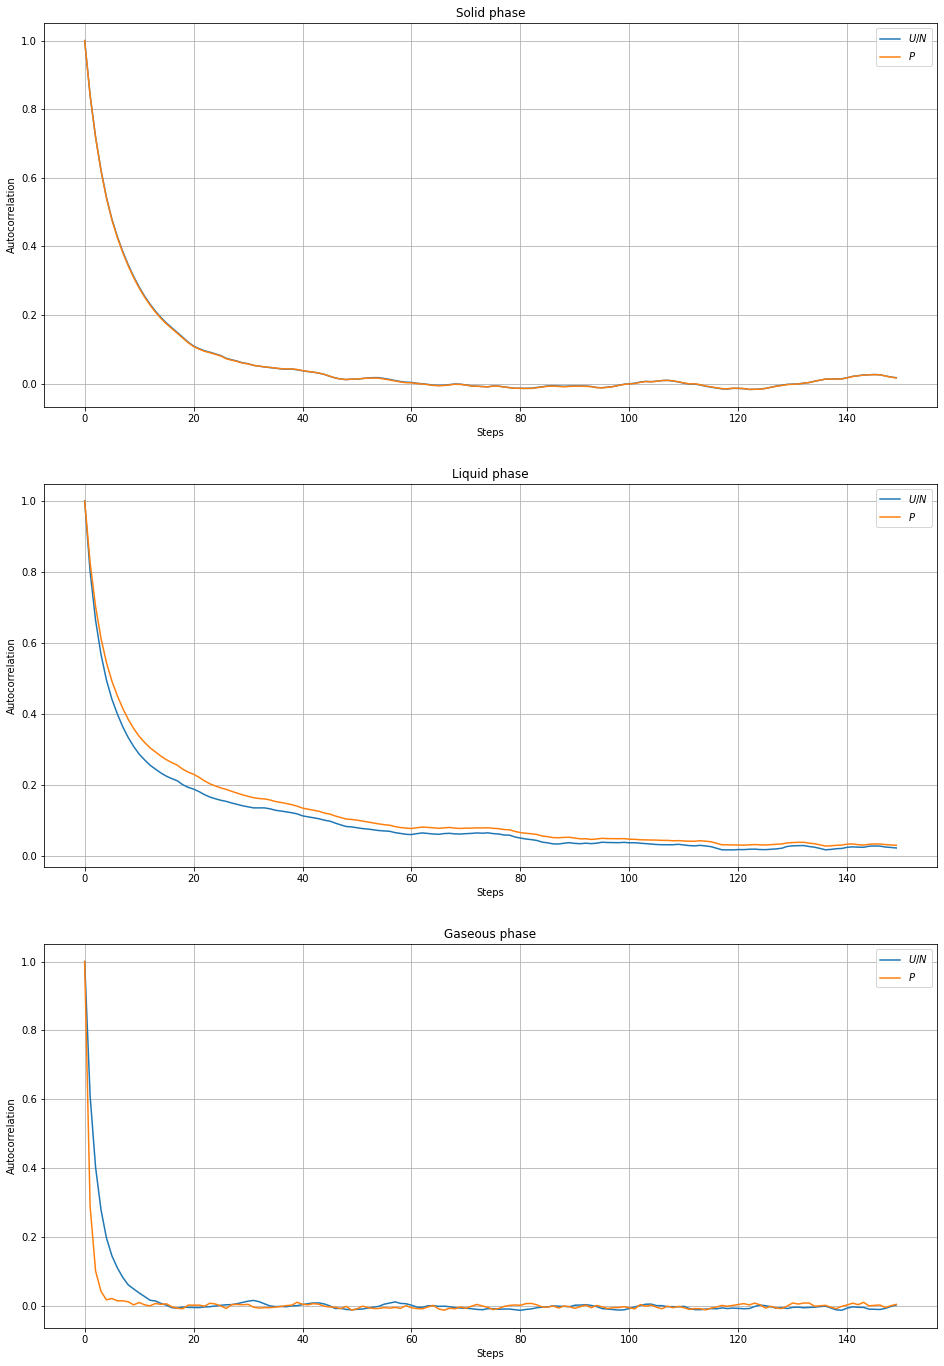

In [2]:
plt.figure(figsize=(16,24))
plt.subplot(311)
e_solid=np.loadtxt("solid/ex1/output.epot.0", usecols=[1])
corr_epot=[autocorrelation(e_solid, t)  for t in range(150)]
corr_length_epot, var_pres = curve_fit(f, np.arange(150), corr_epot)

p_solid=np.loadtxt("solid/ex1/output.pres.0", usecols=[1])
corr_pres=[autocorrelation(p_solid, t)  for t in range(150)]
corr_length_pres, var_pres = curve_fit(f, np.arange(150),  corr_pres)

print("Correlation Length for energy (solid)", corr_length_epot,"\nCorrelation Length for pressure (solid)",corr_length_pres)

plt.plot(corr_epot, label="$U/N$")
plt.plot(corr_pres, label="$P$")
#plt.axhline(0, linestyle="-.")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.subplot(312)
e_liquid=np.loadtxt("liquid/ex1/output.epot.0", usecols=[1])
corr_epot=[autocorrelation(e_liquid, t)  for t in range(150)]
corr_length_epot, var = curve_fit(f, np.arange(150), corr_epot)

p_liquid=np.loadtxt("liquid/ex1/output.pres.0", usecols=[1])
corr_pres=[autocorrelation(p_liquid, t)  for t in range(150)]
corr_length_pres, var_pres = curve_fit(f, np.arange(150),  corr_pres)

print("Correlation Length for energy (liquid)", corr_length_epot,"\nCorrelation Length for pressure (liquid)",corr_length_pres)


plt.plot(corr_epot, label="$U/N$")
plt.plot(corr_pres, label="$P$")
#plt.axhline(0, linestyle="-.")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.subplot(313)
e_gas=np.loadtxt("gas/ex1/output.epot.0", usecols=[1])
corr_epot=[autocorrelation(e_gas, t)  for t in range(150)]
corr_length_epot, var = curve_fit(f, np.arange(150), corr_epot)

p_gas=np.loadtxt("gas/ex1/output.pres.0", usecols=[1])
corr_pres=[autocorrelation(p_gas, t)  for t in range(150)]
corr_length_pres, var = curve_fit(f, np.arange(150),  corr_pres)

print("Correlation Length for energy (gas)", corr_length_epot,"\nCorrelation Length for pressure (gas)",corr_length_pres)


plt.plot(corr_epot, label="$U/N$")
plt.plot(corr_pres, label="$P$")
#plt.axhline(0, linestyle="-.")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()

By visual inspection of the liquid curve I note that the exponential fit would have performed worse that for the other two cases. Despite of this, correlations length souds reasonable in each case, in particular it's reasonable that correlation length for the gaseous phase is almost an order of magnitude less than in both the liquid and solid phase.

In [3]:
def get_error(x, block_length):
    mc_step=len(x)
    Nblocks=int(mc_step/block_length)
    glob_avg=0
    glob_avg2=0

    for i in range(Nblocks):
        blk_avg=0
        for j in range(block_length):
            blk_avg += x[j+block_length*i]
        blk_avg /= block_length

        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

    return np.sqrt((glob_avg2/Nblocks-(glob_avg/Nblocks)**2)/Nblocks)

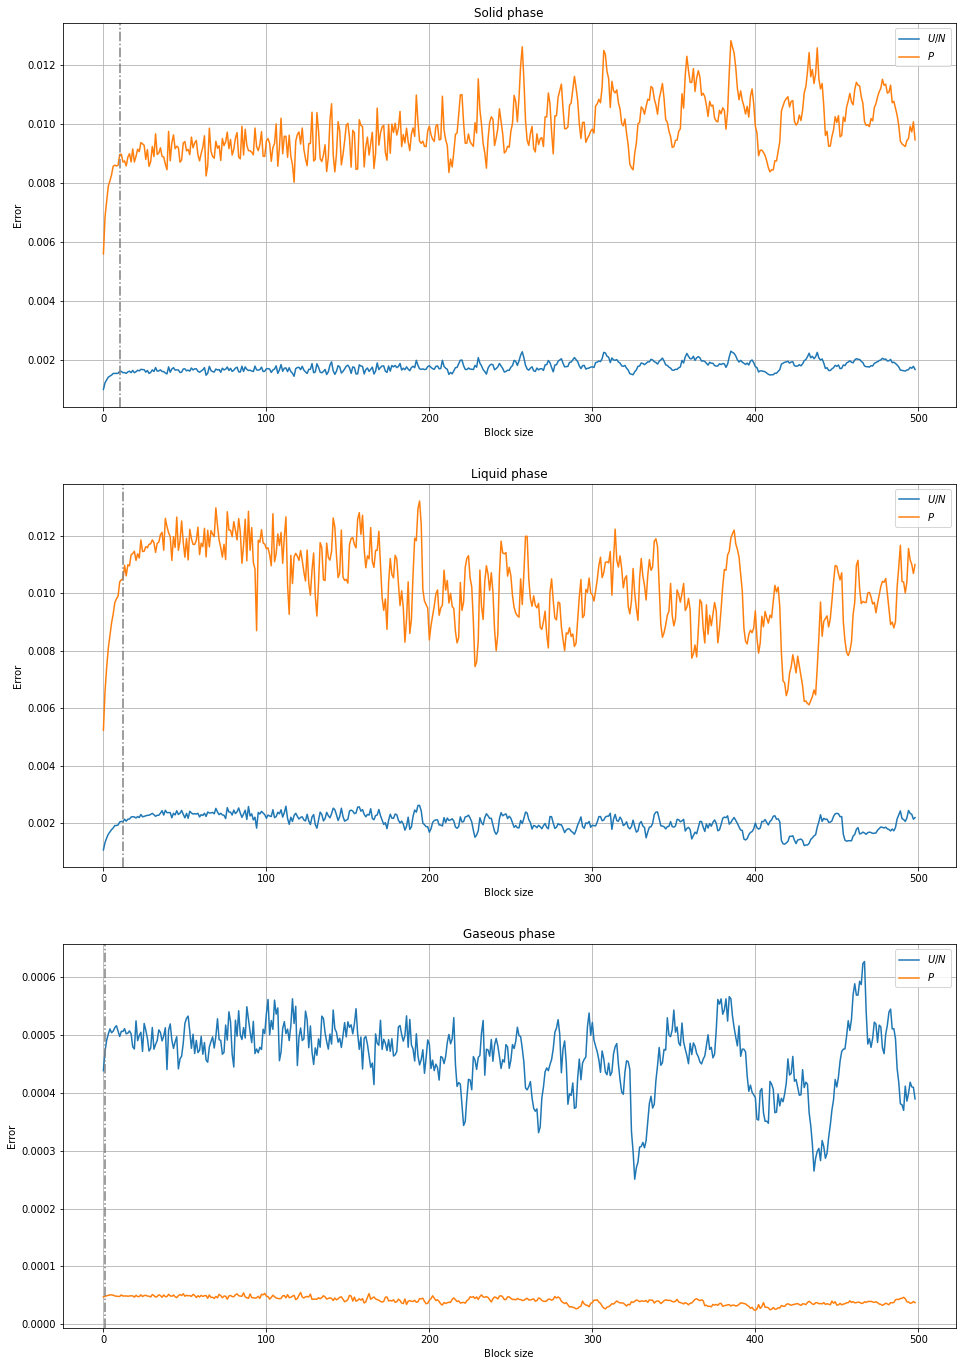

In [4]:
e_err_solid=[]
p_err_solid=[]

e_err_liquid=[]
p_err_liquid=[]

e_err_gas=[]
p_err_gas=[]

#x=range(10, 5000, 10)
for block_length in range(10, 5000, 10):
    e_err_solid.append(get_error(e_solid,block_length) )
    p_err_solid.append(get_error(p_solid,block_length) )
                                 
    e_err_liquid.append( get_error(e_liquid,block_length) )
    p_err_liquid.append( get_error(p_liquid,block_length) )
                                   
    e_err_gas.append(get_error(e_gas,block_length) )
    p_err_gas.append(get_error(p_gas,block_length) )
    
plt.figure(figsize=(16,24))
plt.subplot(311)
plt.plot(e_err_solid, label="$U/N$")
plt.plot(p_err_solid, label="$P$")
plt.axvline(10, linestyle="-.", color='gray')
plt.xlabel('Block size')
plt.ylabel('Error')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.subplot(312)

plt.plot(e_err_liquid, label="$U/N$")
plt.plot(p_err_liquid, label="$P$")
plt.axvline(12, linestyle="-.", color='gray')
plt.xlabel('Block size')
plt.ylabel('Error')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(e_err_gas, label="$U/N$")
plt.plot(p_err_gas, label="$P$")
plt.axvline(1, linestyle="-.", color='gray')
plt.xlabel('Block size')
plt.ylabel('Error')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()


Inspecting the error w.r.t the blocks' size, it is clear that choosing a blocks' size less than the correlation length causes a dangerous underestimation of the statistical error. Then the three curves exhibit a non definite tendency, while it seems to me that there are two different regimes of fluctuations in all the three curves.  

By visual inspection of this plots, I chose 200 steps as the block size for all the three phases.

I'm appealed to relate this to a sign of an effective validity of the CLT. In fact, the change of scale of the fluctuations occurs later in both the liquid and solid cases - that have higher correlation length -  w.r.t the gaseous phases, so one could imagine that it requires more steps to ensure the validity of the CLT. Anyhow this is just a claim that would definitely require more inspection.

### Exercise 07.4

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


k_b=1.380649e-23  #J/K
a_m_u=1.66054e-27 #Kg

# Argon SI conversion

sigma_ar=0.34e-9 #m
epsilon_ar=120.*k_b #K
m_ar=39.948*a_m_u #Kg

# Krypton SI conversion

sigma_kr=0.364e-9 #m
epsilon_kr=164*k_b #K
m_kr=83.798*a_m_u #Kg

delta=0.0005

#conversion from lj timestep to real timestep
time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)
time_step_kr=delta*np.sqrt(m_kr*sigma_kr*sigma_kr/epsilon_kr)
print("  Argon Timestep: " , time_step_ar, "\nKrypton Timestep: " , time_step_kr)

  Argon Timestep:  1.0756942530952399e-15 
Krypton Timestep:  1.4267547272160648e-15


1)  **ARGON**

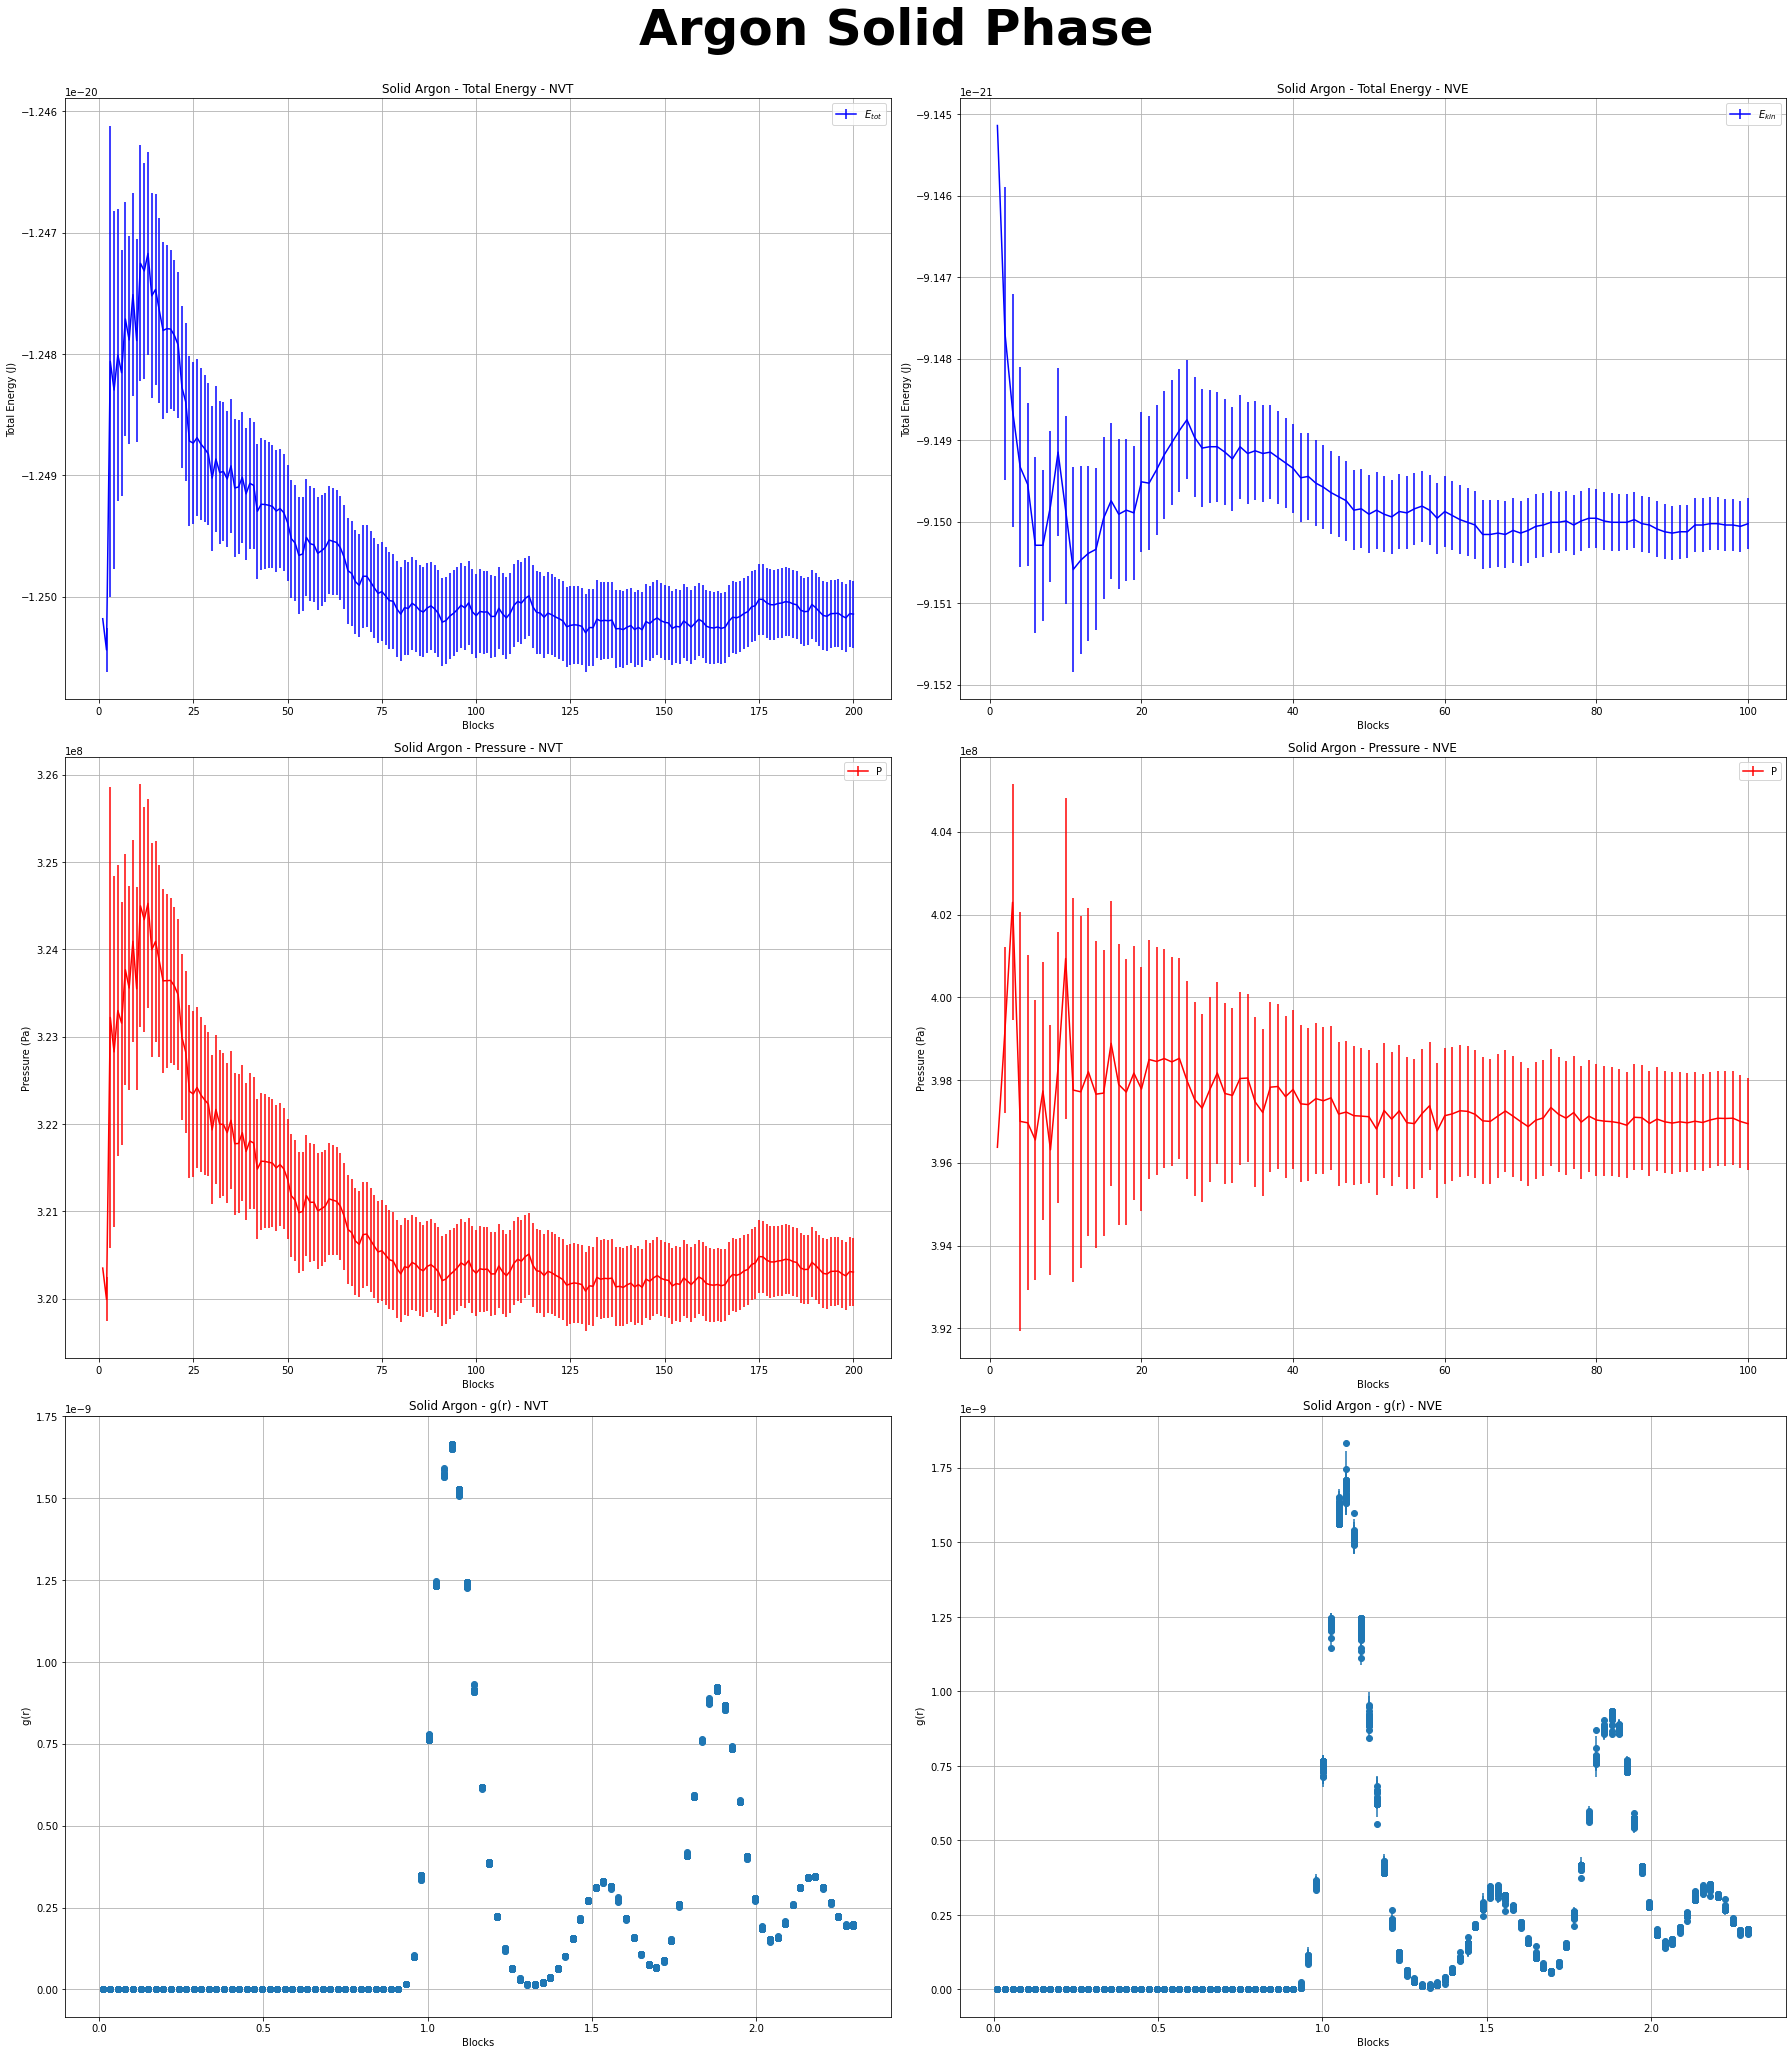

In [113]:
plt.figure(figsize=(25,30))

#================= solid  
ave_etot, error_etot = np.loadtxt("solid/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("solid/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Solid Argon - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Solid Argon - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("solid/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Solid Argon - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/solid/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/solid/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Solid Argon - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Solid Argon - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/solid/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Solid Argon - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Argon Solid Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

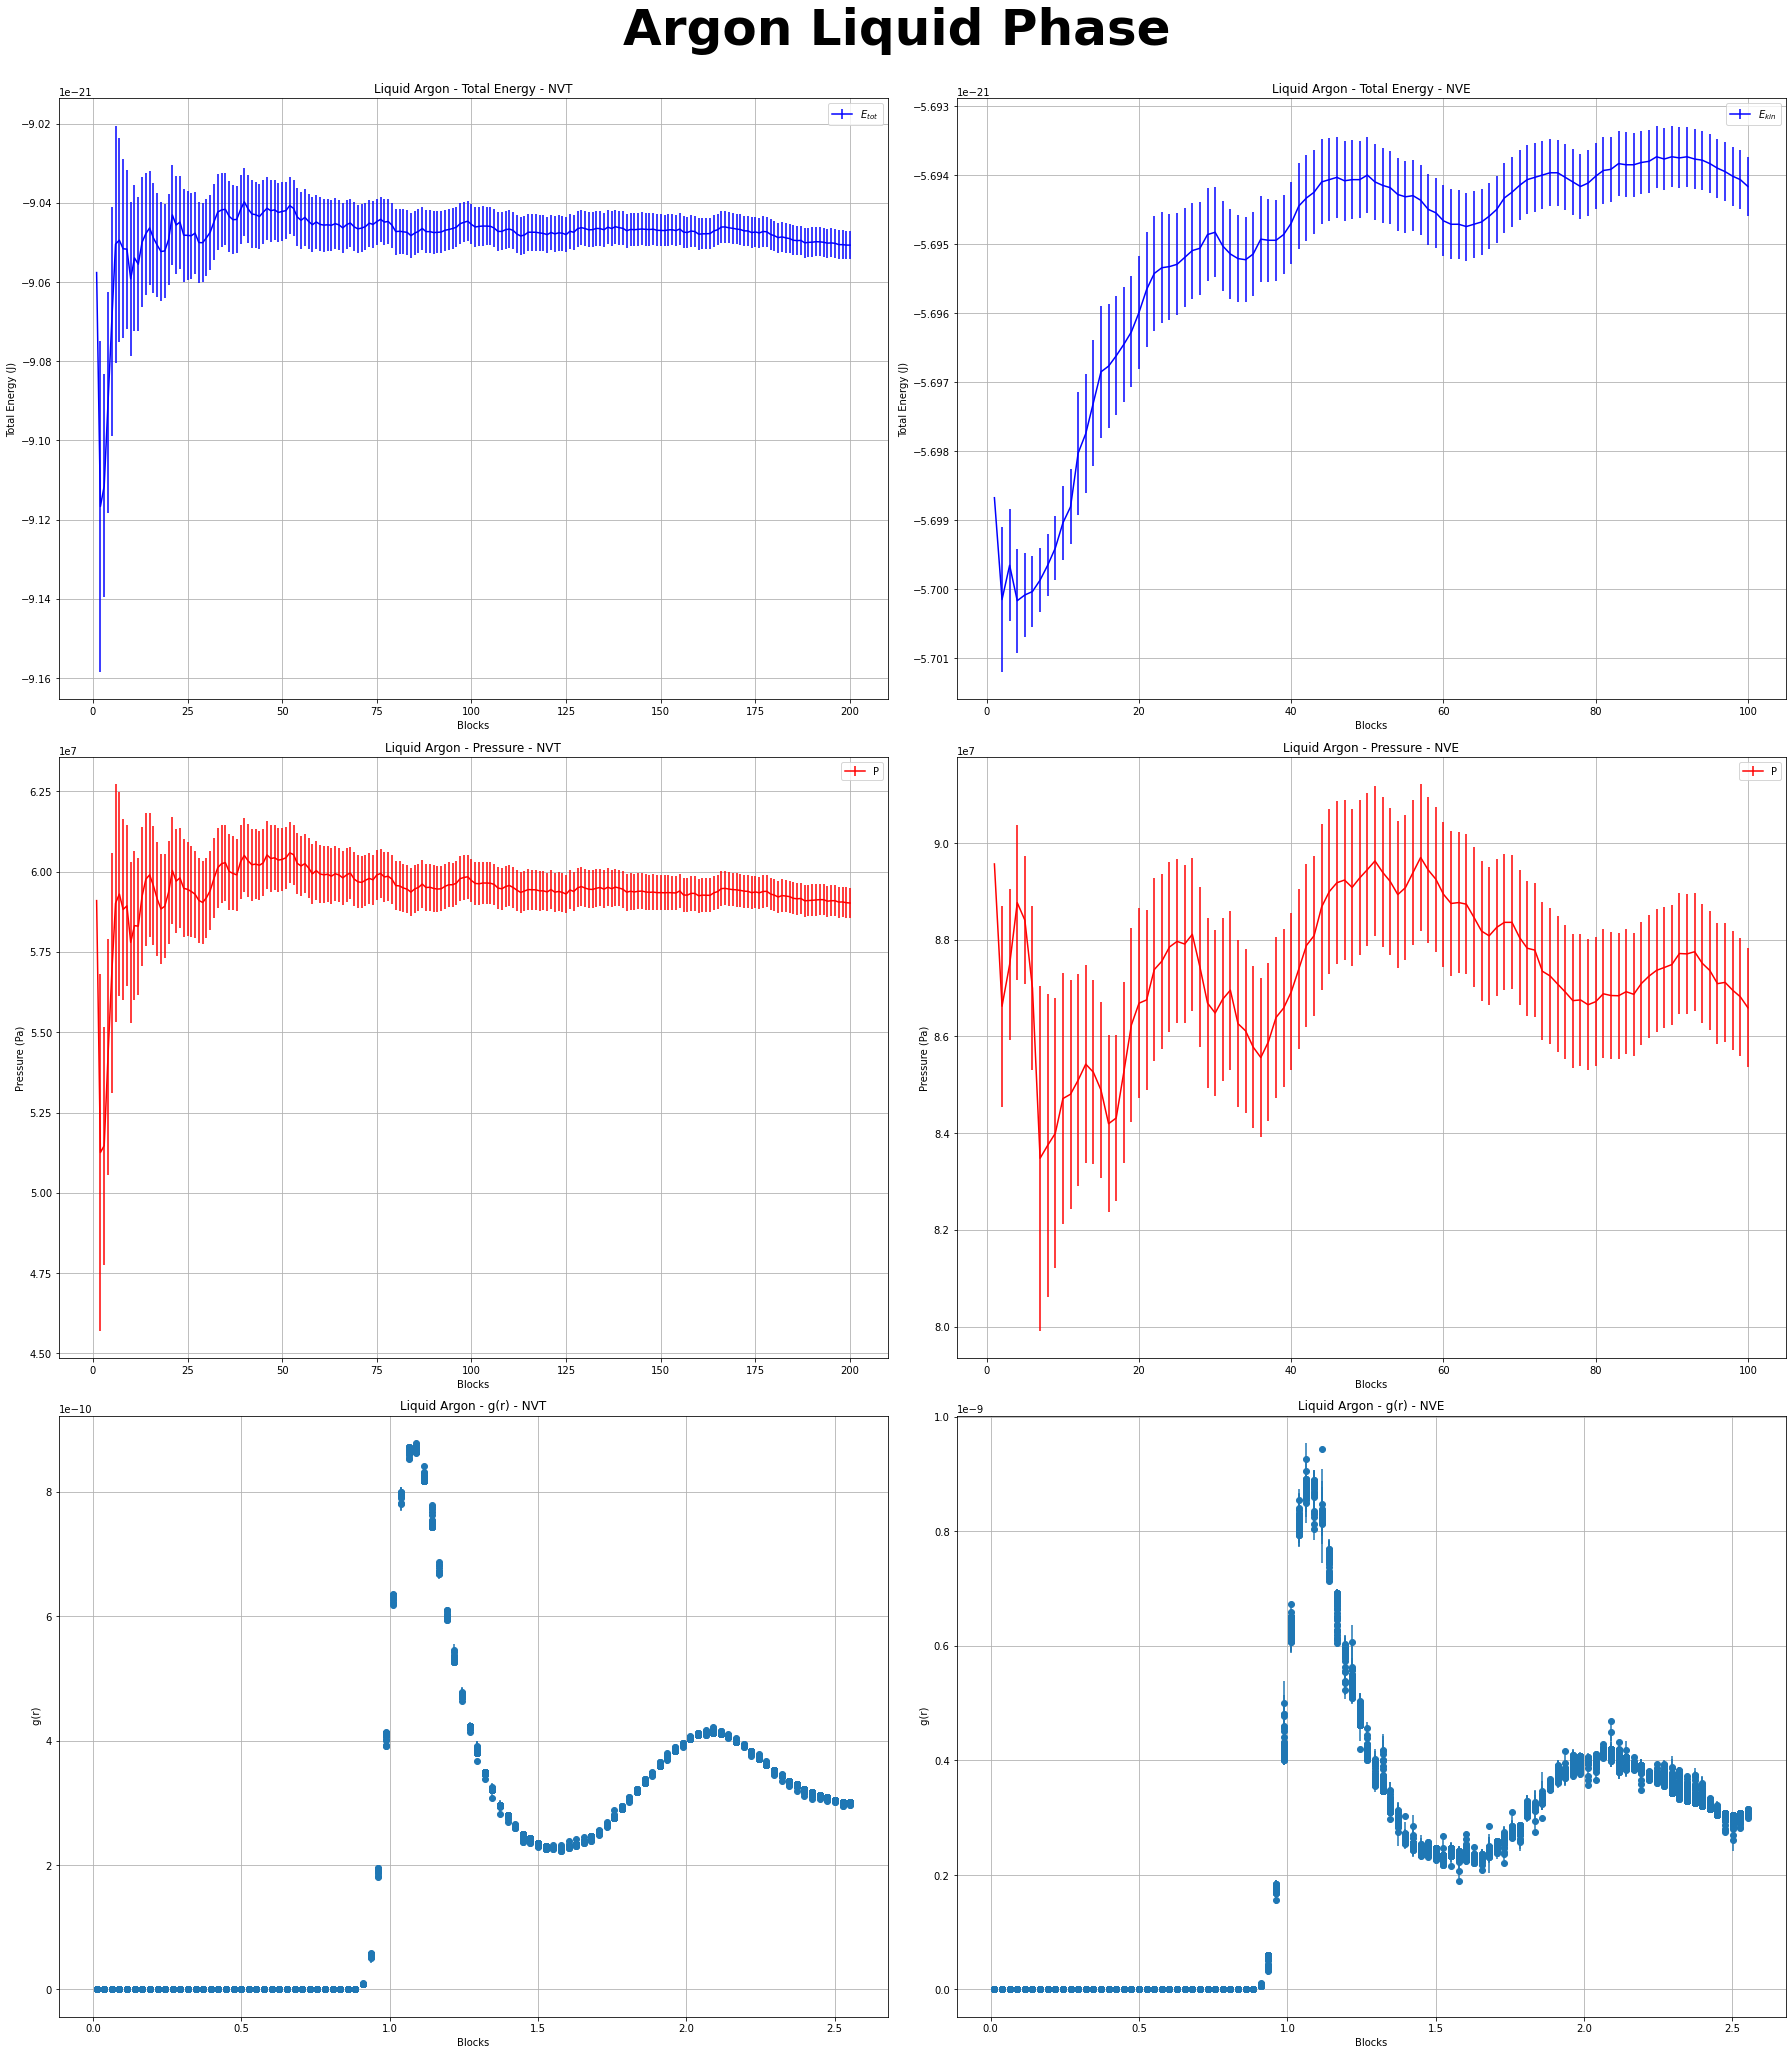

In [112]:
plt.figure(figsize=(25,30))

#================= liquid  
ave_etot, error_etot = np.loadtxt("liquid/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("liquid/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Liquid Argon - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Liquid Argon - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("liquid/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Liquid Argon - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/liquid/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/liquid/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)
x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Liquid Argon - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Liquid Argon - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/liquid/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Liquid Argon - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Argon Liquid Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

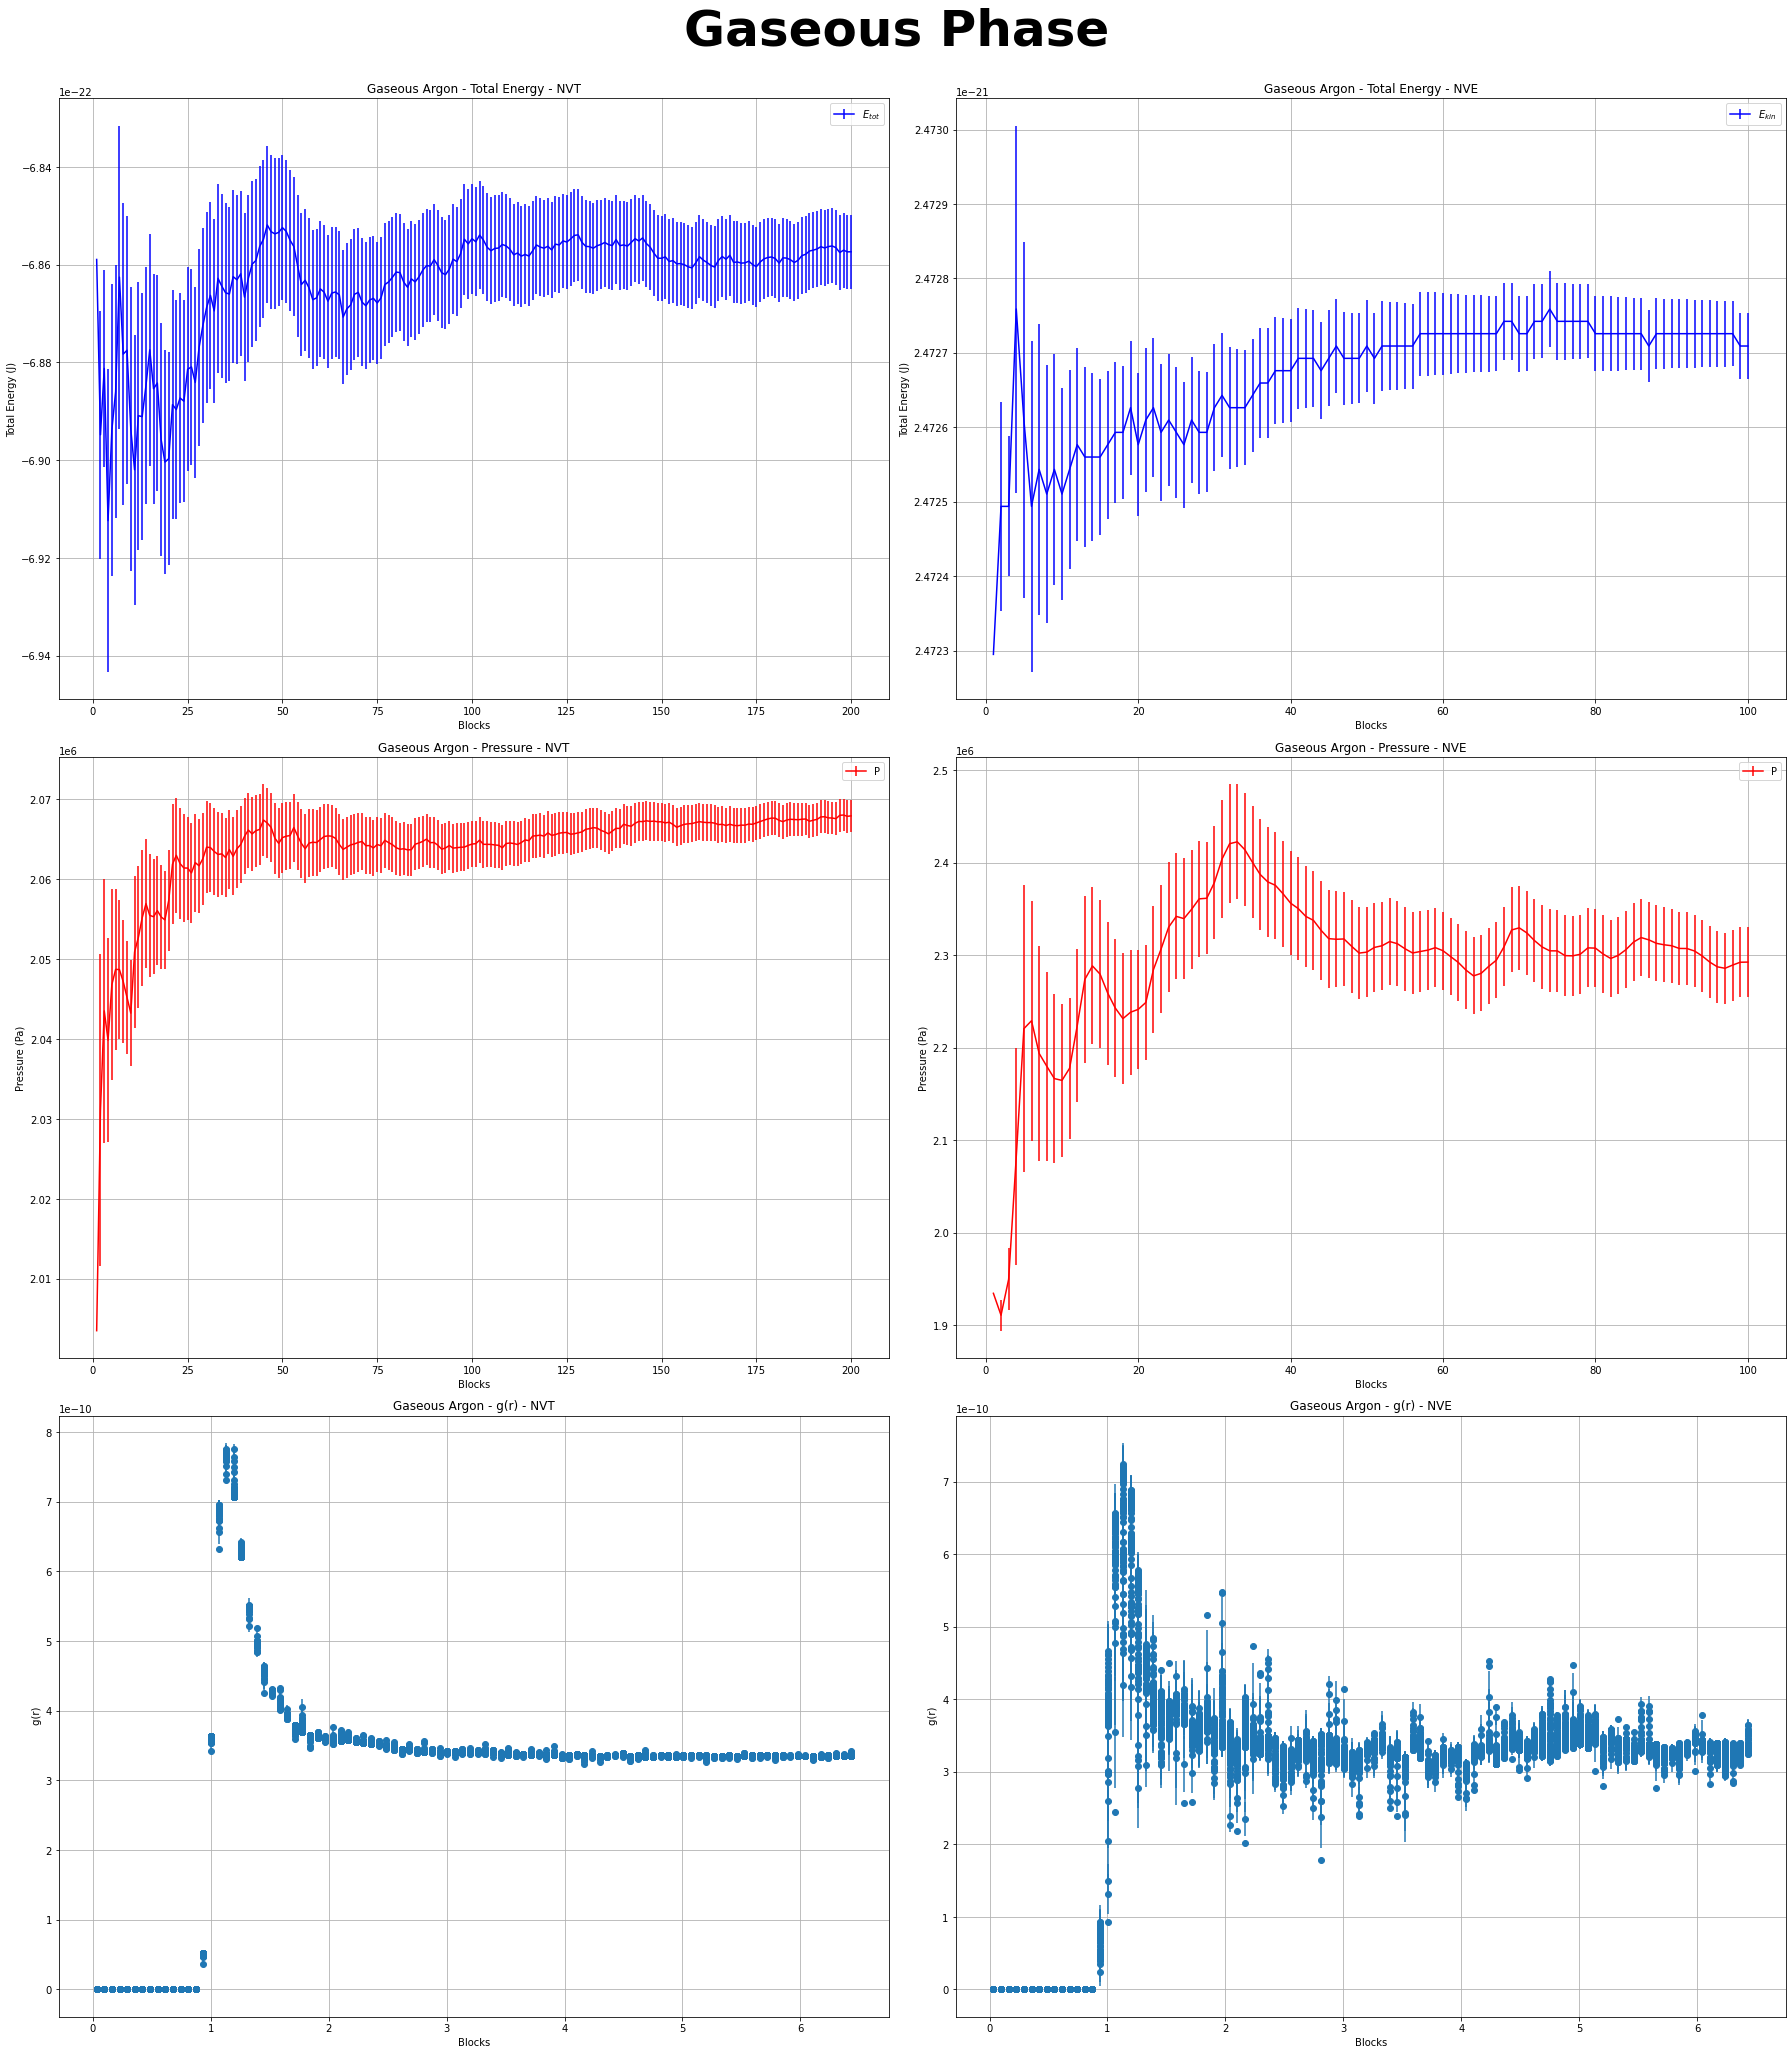

In [106]:
plt.figure(figsize=(25,30))

#================= gas  
ave_etot, error_etot = np.loadtxt("gas/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("gas/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Gaseous Argon - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Gaseous Argon - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("gas/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Gaseous Argon - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/gas/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/gas/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)
x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Gaseous Argon - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Gaseous Argon - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/gas/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Gaseous Argon - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_ar, yerr=error_gofr*sigma_ar, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Gaseous Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2) **KRYPTON**

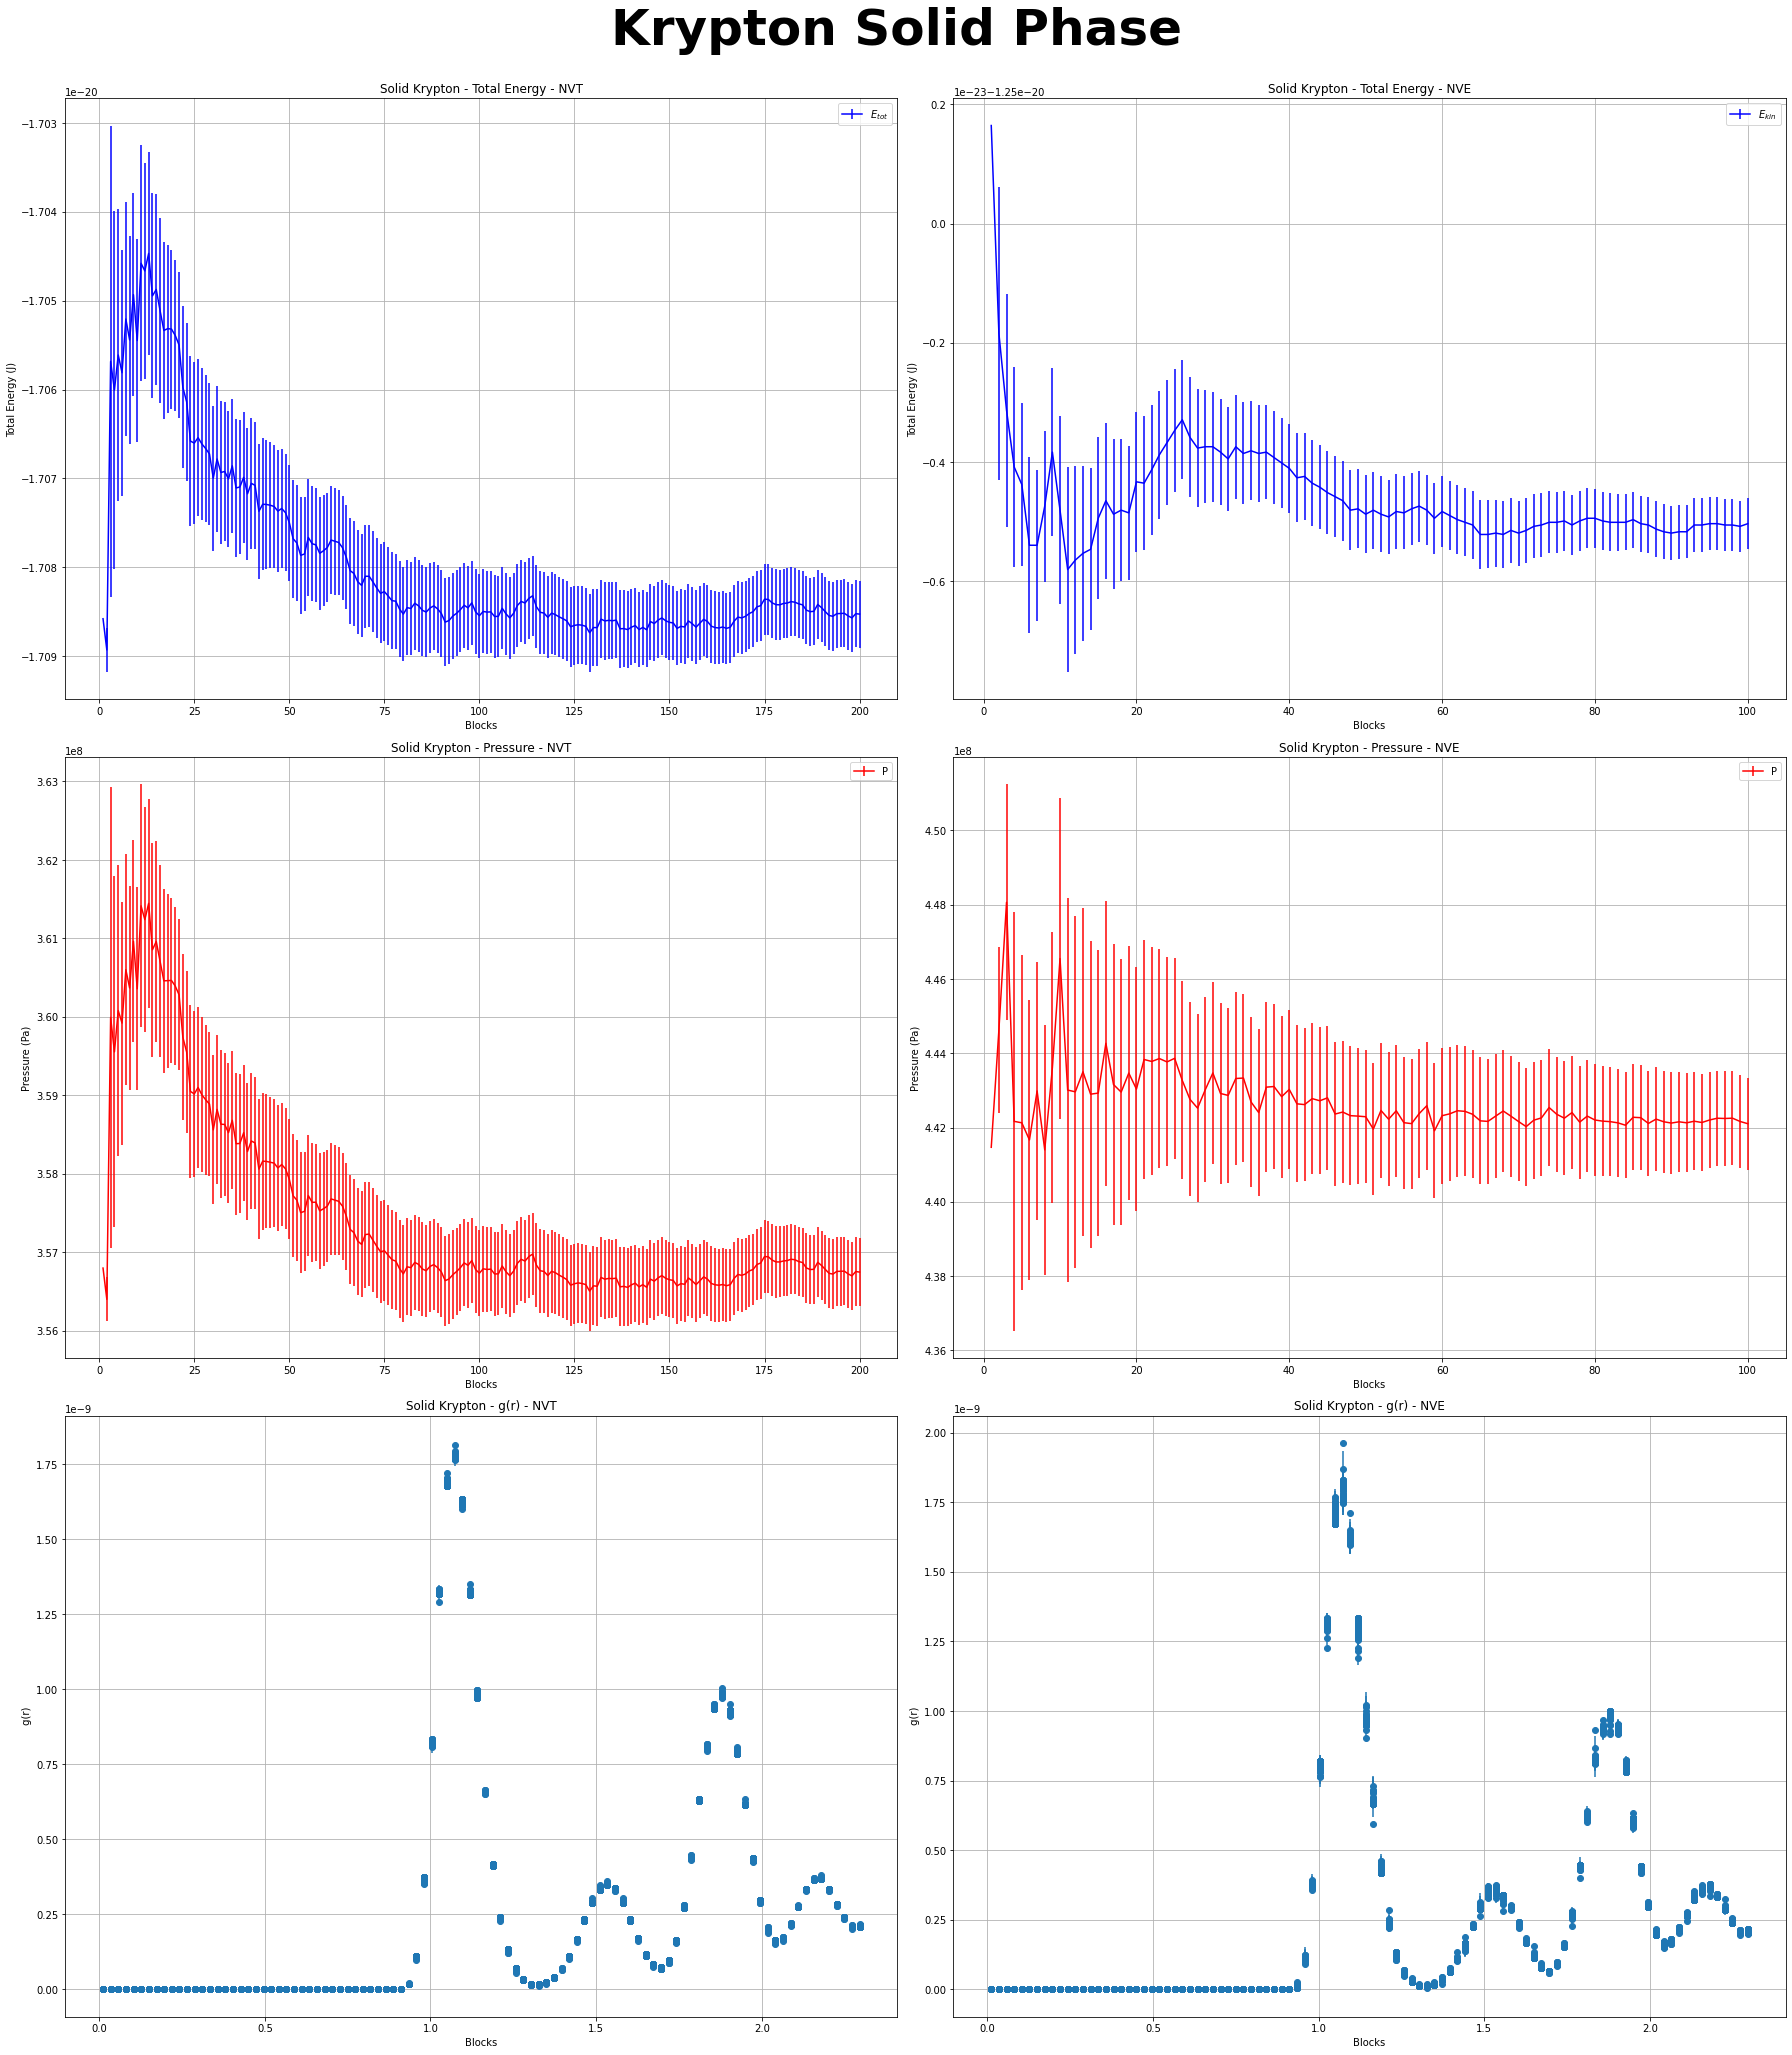

In [107]:
plt.figure(figsize=(25,30))
#================= solid  
ave_etot, error_etot = np.loadtxt("solid/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("solid/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Solid Krypton - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Solid Krypton - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("solid/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Solid Krypton - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/solid/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/solid/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Solid Krypton - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Solid Krypton - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/solid/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Solid Krypton - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Krypton Solid Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

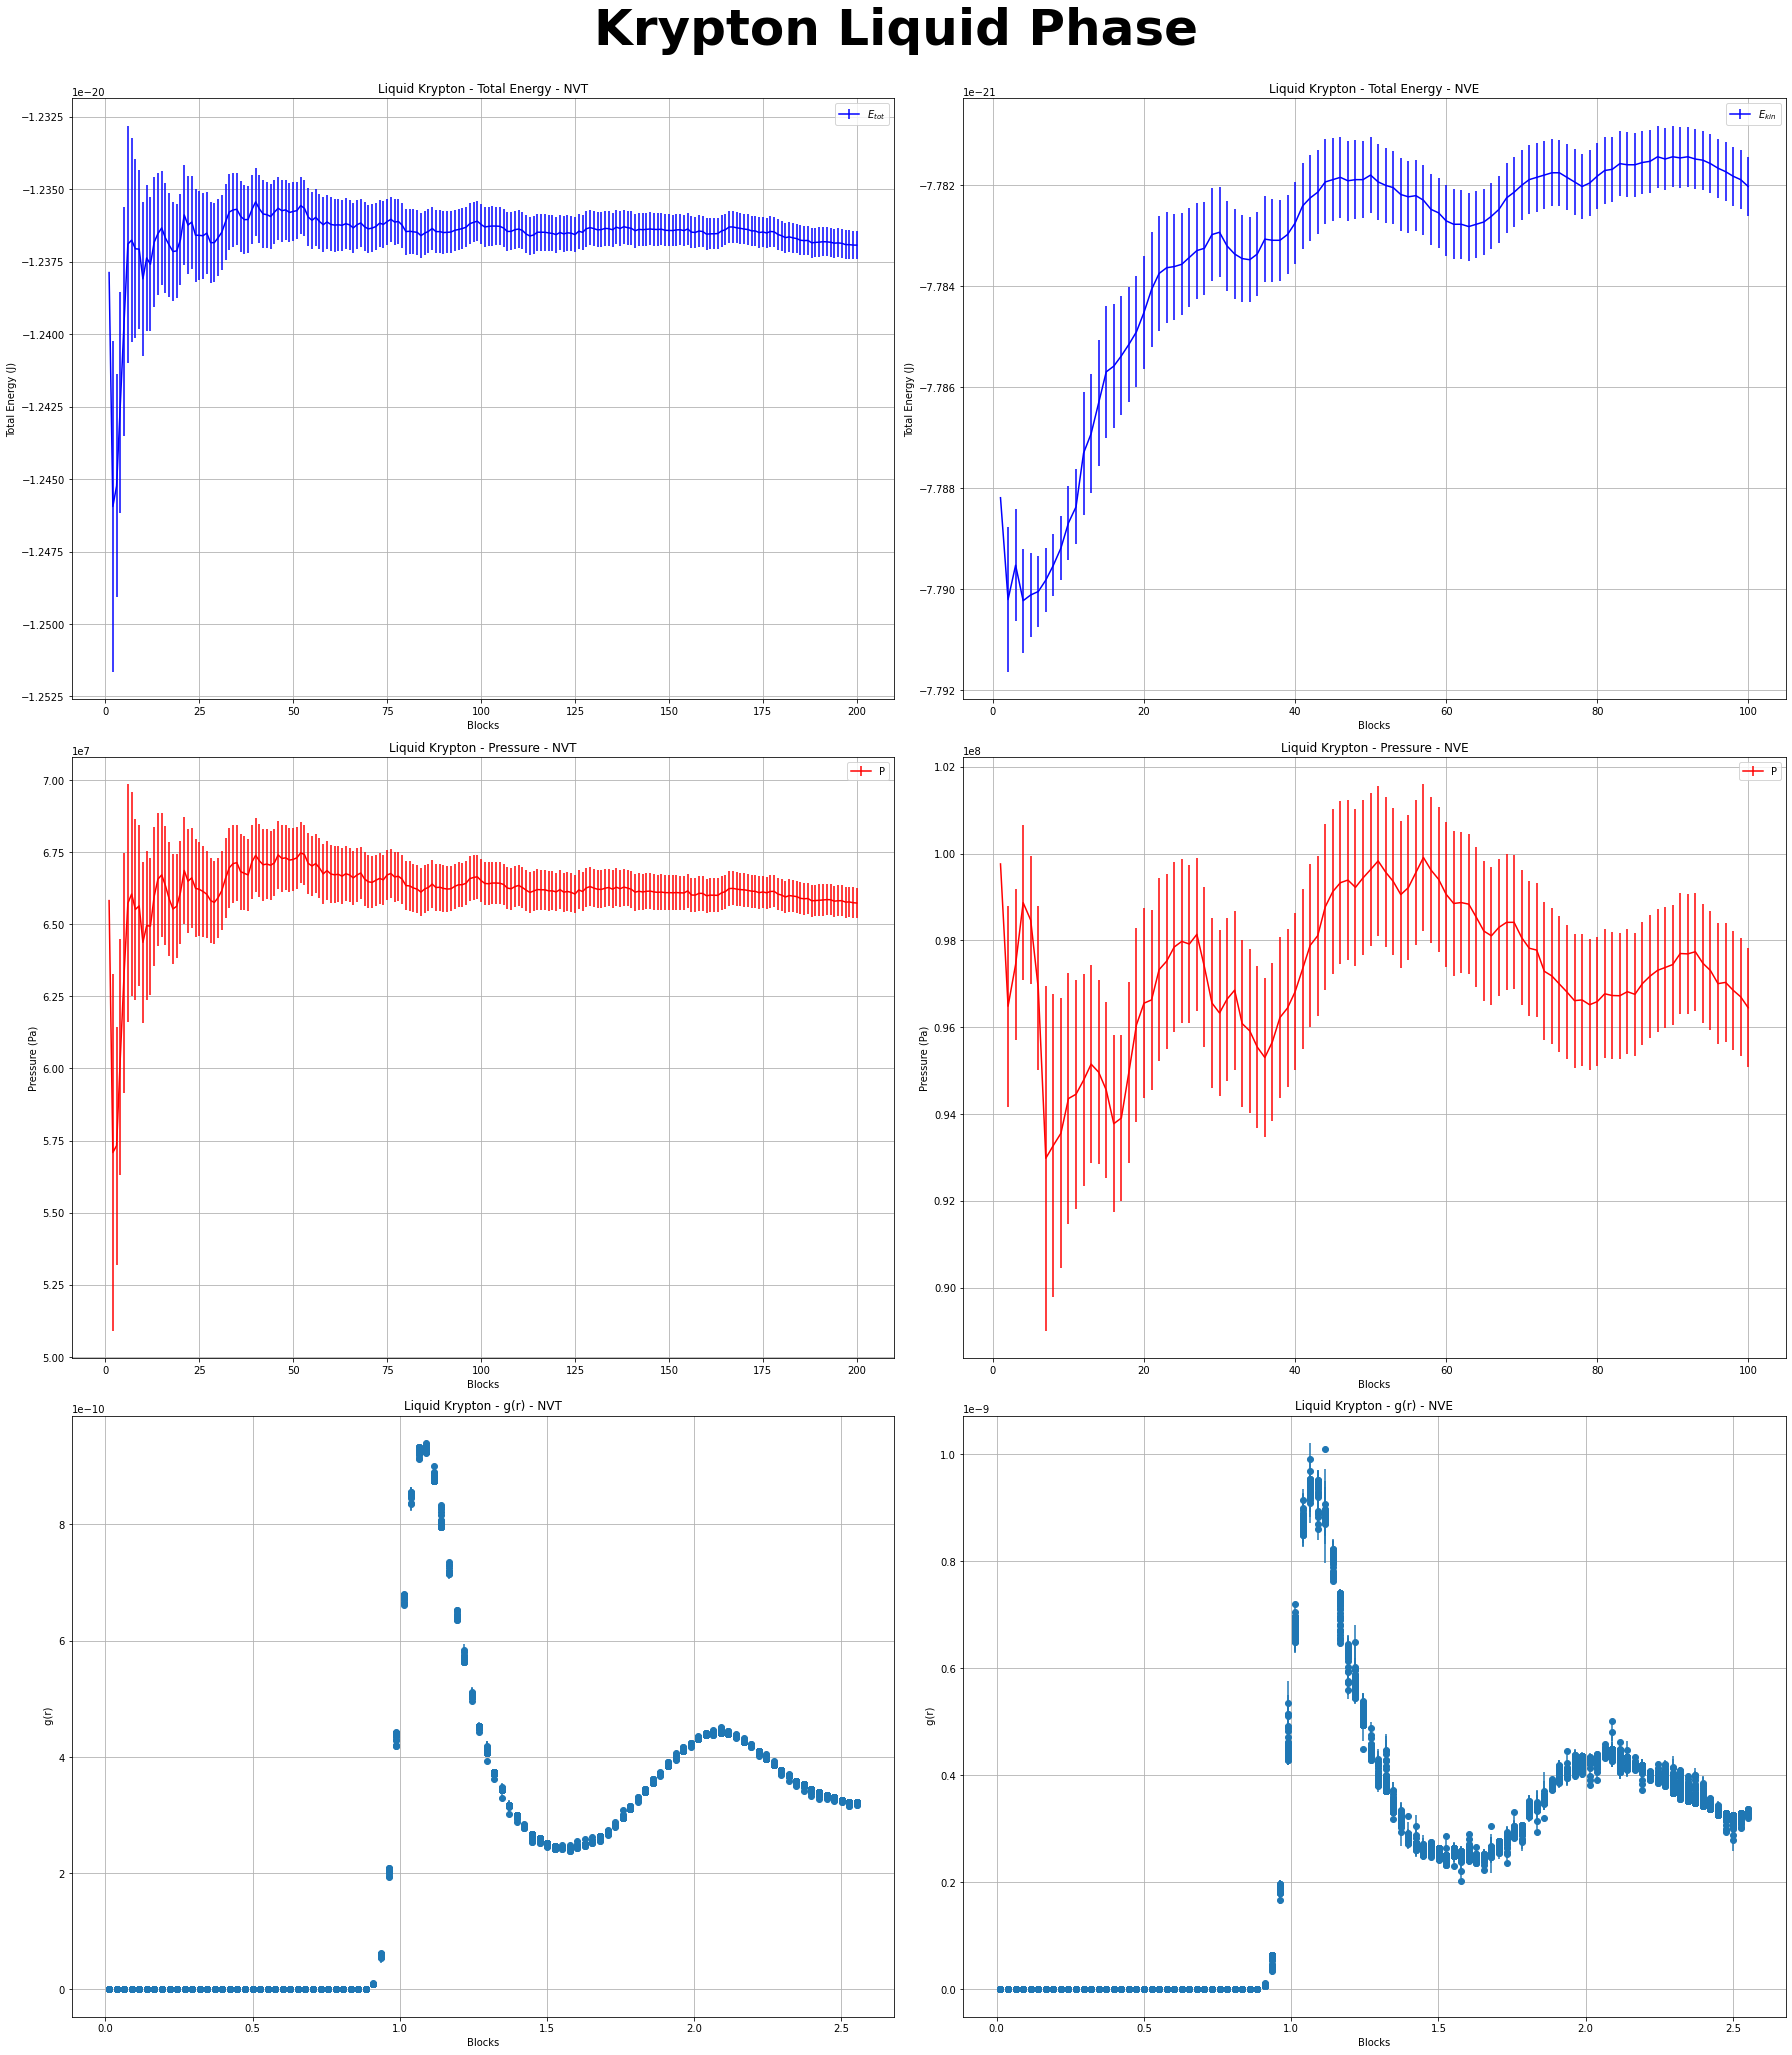

In [108]:
plt.figure(figsize=(25,30))

#================= liquid  
ave_etot, error_etot = np.loadtxt("liquid/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("liquid/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Liquid Krypton - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Liquid Krypton - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("liquid/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Liquid Krypton - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/liquid/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/liquid/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)
x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Liquid Krypton - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Liquid Krypton - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/liquid/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Liquid Krypton - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Krypton Liquid Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

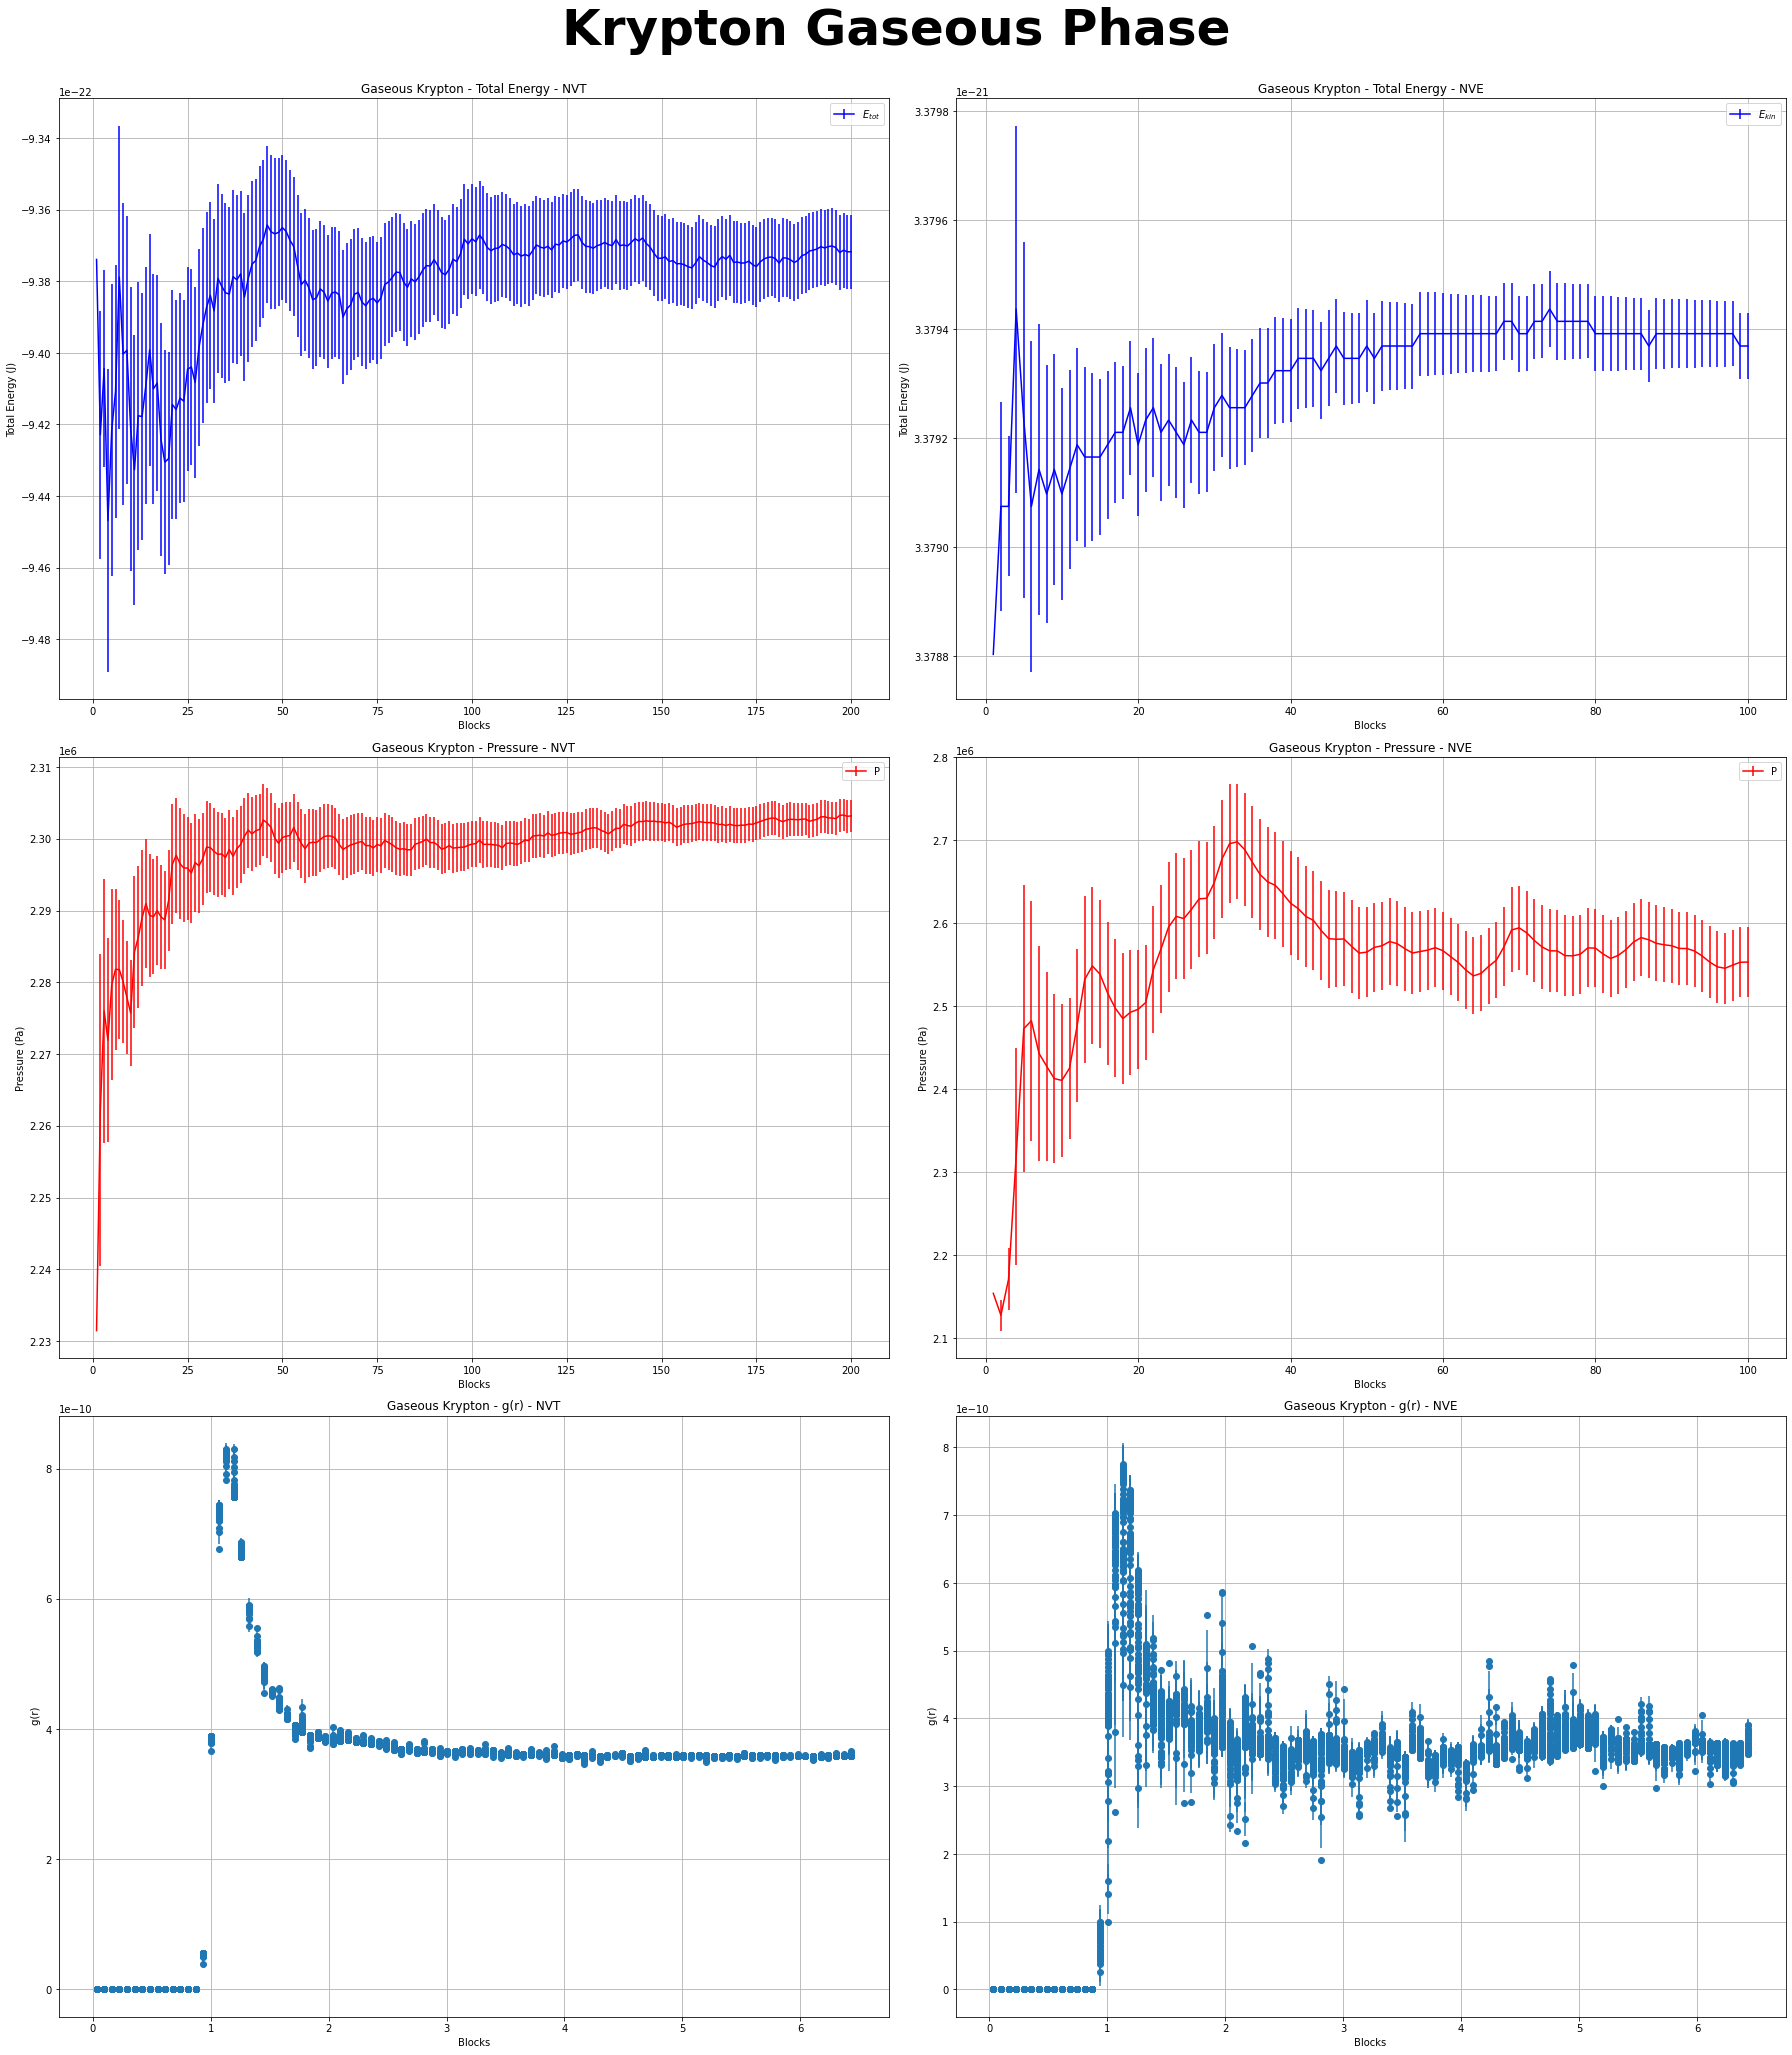

In [109]:
plt.figure(figsize=(25,30))

#================= gas  
ave_etot, error_etot = np.loadtxt("gas/output.epot.0",  usecols=(2,3), unpack='true')
ave_pres, error_pres = np.loadtxt("gas/output.pres.0",  usecols=(2,3), unpack='true')

x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(321)
plt.title("Gaseous Krypton - Total Energy - NVT")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(323)
plt.title("Gaseous Krypton - Pressure - NVT")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("gas/output.gave.0", usecols=[0,1,2], unpack=True)

plt.subplot(325)
plt.title("Gaseous Krypton - g(r) - NVT")
plt.errorbar(x, ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)

ave_etot, error_etot = np.loadtxt("../Esercizio04/data4es07/gas/ave_etot.dat",  usecols=(1,2), unpack='true', skiprows=350)
ave_pres, error_pres = np.loadtxt("../Esercizio04/data4es07/gas/ave_pres.dat",  usecols=(1,2), unpack='true', skiprows=350)
x=np.linspace(1, len(ave_etot), len(ave_etot))

plt.subplot(322)
plt.title("Gaseous Krypton - Total Energy - NVE")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(324)
plt.title("Gaseous Krypton - Pressure - NVE")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')

plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

x, ave_gofr, error_gofr = np.loadtxt("../Esercizio04/data4es07/gas/ave_gofr.dat", usecols=[0,1,2], unpack=True)

plt.subplot(326)
plt.title("Gaseous Krypton - g(r) - NVE")
plt.errorbar(x,ave_gofr*sigma_kr, yerr=error_gofr*sigma_kr, fmt='o')
plt.xlabel('Blocks')
plt.ylabel(' g(r)')
plt.grid(True)
plt.suptitle("Krypton Gaseous Phase", fontsize=50, fontweight='bold' )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

While the two $g(r)$ computed with the two codes show a similar behaviour (Despite a souspicious difference in the order of magnitude of the computed uncertainities), the two simulations does not yield the same results for the inspected thermodynamic quantities. The reported result of the MD-simulations also disagree with the results reported in Notebook 4. 

In order to implement the $g(r)$ calculation in the MD code, I deeply rearranged the part I added to the provided MD code to solve Exercise 04. I clearly added some nasty bug i was not able to purge, even if helped by some insight the rude agreement of $g(r)$ results could have provided, for example: 
- I do not expect a bug in the block average because the $g(r)$  behaviour gets reproducted 
- I expected a bug in the estimation of uncertainities, but i didn't found it.
- I do not expect a bug in the calculation of the thermodynamic quantities (as the temperature) that enter the normalization of the $g(r)$ because normalization seems ok by visual inspection of the plots, but I inspected the estimation of the temperature of the MD code, which is very bad, in particular in the gaseous phase.
